In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## Read Data From File

In [2]:
data1 = pd.read_csv('CS_04.csv')

In [3]:
data1.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
data1.shape

(322, 21)

## Data Inspection

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

### Varibles:

AtBat: Number of times at bat in 1986

Hits:  Number of hits in 1986

HmRun: Number of home runs in 1986

Runs:  Number of runs in 1986

RBI:   Number of runs batted in in 1986

Walks: Number of walks in 1986

Years: Number of years in the major leagues

CAtBat: Number of times at bat during his career

CHits:  Number of hits during his career

CHmRun: Number of home runs during his career

CRuns:  Number of runs during his career

CRBI:   Number of runs batted in during his career

CWalks: Number of walks during his career

League: A factor with levels A and N indicating player's league at the end of 1986

Division: A factor with levels E and W indicating player's division at the end of 1986

PutOuts:  Number of put outs in 1986

Assists:  Number of assists in 1986

Errors:   Number of errors in 1986

Salary:   1987 annual salary on opening day in thousands of dollars

NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987


In [6]:
data1.isna().sum()

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
#Remove records with MVs
data2 = data1.dropna(subset = ['Salary'], inplace = False, axis = 0)

In [8]:
#Remove players' name
data2 = data2.iloc[:, 1:]

In [9]:
data2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [10]:
data2.shape

(263, 20)

In [11]:
data2.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [12]:
data2.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

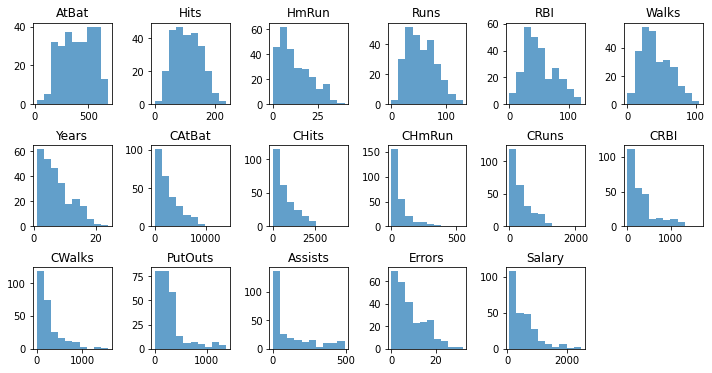

In [14]:
#Continuous variables distribution
var_ind = list(range(13)) + list(range(15, 19))
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(3, 6, i)
    a.hist(data2.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text(data2.columns[var_ind[i - 1]])

Text(0.5, 1.0, 'Boxplot of Salary')

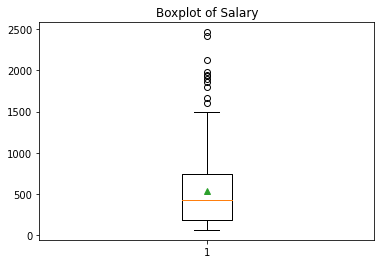

In [15]:
#Box plot of price
plt.boxplot(data2['Salary'], showmeans = True)
plt.title('Boxplot of Salary')

In [16]:
#Correlation Analysis
corr_table = round(data2.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52


<AxesSubplot:>

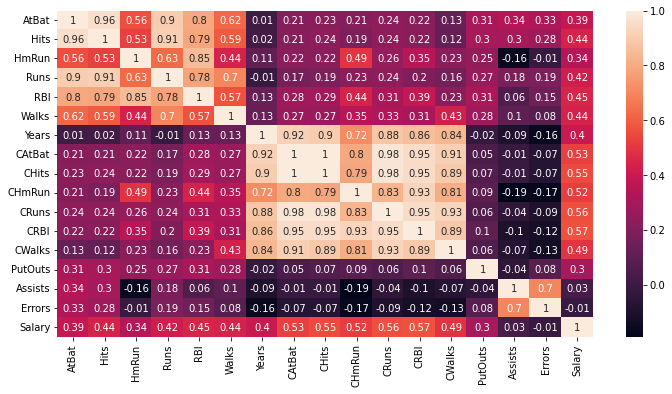

In [17]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

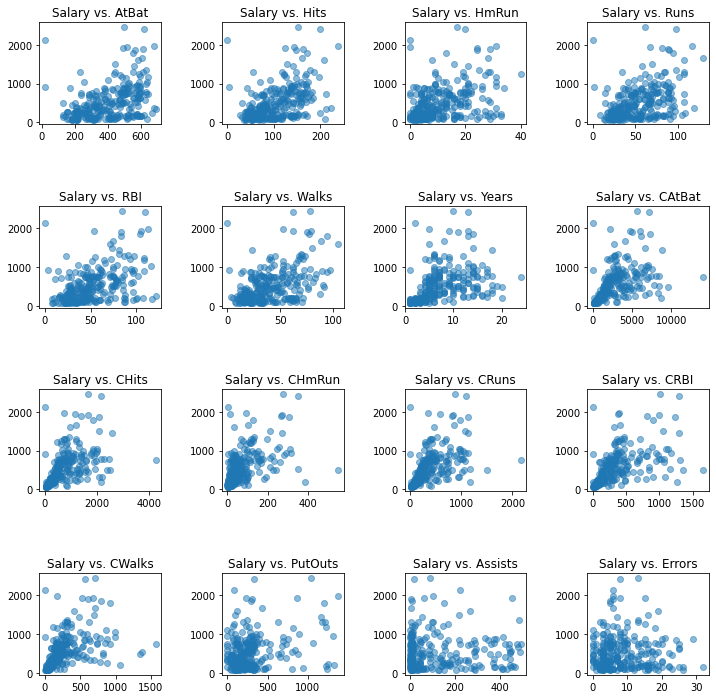

In [18]:
#Scatter Plot
var_ind = list(range(13)) + list(range(15, 18))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    a = plot.add_subplot(4, 4, i)
    a.scatter(x = data2.iloc[: , var_ind[i - 1]], y = data2.iloc[: , 18], alpha = 0.5)
    a.title.set_text('Salary vs. ' + data2.columns[var_ind[i - 1]])

In [19]:
#Categorical variables
data2['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [20]:
data2['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [21]:
data2['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

## Data Preparation

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.2, random_state = 1234)

In [23]:
train.shape

(210, 20)

In [24]:
train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,409.009524,109.923810,11.880952,55.871429,52.290476,41.838095,7.409524,2658.804762,721.333333,70.361905,360.742857,331.709524,259.609524,292.023810,111.880952,8.228571,562.288433
std,148.097730,46.149683,8.872306,25.833802,26.641091,21.846408,4.624038,2126.724958,596.666853,83.085605,307.176493,315.682880,251.547022,275.904453,143.031332,6.307521,466.852811
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,9.000000,0.000000,6.000000,7.000000,4.000000,0.000000,0.000000,0.000000,68.000000
25%,283.000000,73.000000,5.000000,34.000000,30.000000,24.000000,4.000000,928.250000,230.250000,15.000000,116.250000,99.250000,76.500000,110.250000,7.000000,3.000000,210.000000
50%,417.000000,105.500000,9.000000,53.500000,47.000000,37.500000,6.000000,2035.500000,546.500000,40.000000,278.500000,251.500000,179.500000,226.000000,41.500000,6.000000,450.000000
75%,528.750000,144.750000,18.000000,76.000000,73.000000,57.000000,11.000000,3900.250000,1058.000000,92.750000,493.500000,419.750000,318.500000,318.500000,172.250000,12.750000,761.250000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,20.000000,9528.000000,2583.000000,548.000000,1509.000000,1659.000000,1380.000000,1377.000000,492.000000,29.000000,2460.000000


In [25]:
test.shape

(53, 20)

In [26]:
test.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,382.377358,99.528302,10.584906,50.283019,48.301887,38.245283,6.924528,2652.547170,725.566038,64.792453,363.113208,325.301887,262.867925,285.509434,146.018868,10.037736,431.470491
std,143.530113,40.146177,8.284448,24.056326,22.577716,21.160473,5.445001,2857.368387,828.292045,79.190947,416.452493,355.362414,311.416370,298.059211,151.253797,7.572629,368.025230
min,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,278.000000,70.000000,3.000000,32.000000,32.000000,22.000000,3.000000,682.000000,170.000000,16.000000,93.000000,80.000000,50.000000,117.000000,9.000000,4.000000,155.000000
50%,360.000000,103.000000,9.000000,48.000000,47.000000,34.000000,5.000000,1399.000000,357.000000,36.000000,168.000000,154.000000,128.000000,203.000000,80.000000,8.000000,297.500000
75%,511.000000,138.000000,17.000000,68.000000,60.000000,56.000000,10.000000,3828.000000,970.000000,90.000000,575.000000,458.000000,359.000000,325.000000,269.000000,16.000000,670.000000
max,584.000000,163.000000,33.000000,107.000000,104.000000,83.000000,24.000000,14053.000000,4256.000000,384.000000,2165.000000,1314.000000,1566.000000,1320.000000,465.000000,32.000000,1861.460000


## Building Prediction Model

### Model 1: Linear Regression

In [27]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(train[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
98,0,1,0,1,0,1
206,0,1,0,1,0,1
54,1,0,1,0,1,0
177,1,0,1,0,1,0
27,0,1,0,1,0,1


In [28]:
#Define the feature set X 
X_ = train.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_train = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train = sm.add_constant(X_train) #adding a constant

#Define response variable
y_train = train['Salary']

In [29]:
X_train.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [30]:
y_train.head()

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
Name: Salary, dtype: float64

In [31]:
#Regression Model
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           4.97e-24
Time:                        23:17:42   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Probability'>

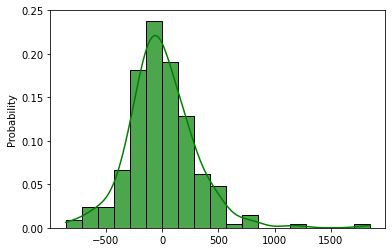

In [32]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm.resid, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm.resid), max(lm.resid), 20))

In [33]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           4.97e-24
Time:                        23:17:42   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      

In [34]:
#Regression Model based on t-test results
lm = sm.OLS(y_train, X_train[['const', 'AtBat', 'Hits','Walks','PutOuts', 'Division_W']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     20.05
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           3.00e-16
Time:                        23:17:42   Log-Likelihood:                -1546.2
No. Observations:                 210   AIC:                             3104.
Df Residuals:                     204   BIC:                             3124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.4321     87.896      1.985      0.049       1.131     347.733
AtBat         -1.6859      0.702     -2.400      0.017      -3.071      -0.301
Hits           7.3574      2.169      3.391      0.001       3.080      11.635
Walks          6.4162      1.569      4.089      0.000       3.322       9.510
PutOuts        0.2851      0.104      2.751      0.006       0.081       0.489
Division_W  -158.5226     54.000     -2.936      0.004    -264.993     -52.052
==============================================================================
Omnibus:                       61.603   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.411
Skew:                           1.249   Prob(JB):                     3.64e-38
Kurtosis:                       6.670   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
295,19,4,1,2,3,1,1,19,4,1,2,3,1,N,W,692,70,8,920.0,A
132,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,A,W,0,0,0,325.0,A
137,343,103,6,48,36,40,15,4338,1193,70,581,421,325,A,E,211,56,13,430.0,A
268,549,149,7,73,47,42,1,549,149,7,73,47,42,N,W,255,450,17,140.0,N
239,309,72,0,33,31,26,5,354,82,0,41,32,26,N,E,117,269,12,130.0,N


In [36]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(test[['League', 'Division', 'NewLeague']])

#Define the feature set X 
X_ = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_test = sm.add_constant(X_test) # adding a constant

#Define response variable
y_test = test['Salary']

In [37]:
pred_lm = lm.predict(X_test[['const', 'AtBat', 'Hits','Walks','PutOuts', 'Division_W']])

In [38]:
#Absolute error
abs_err_lm = abs(y_test - pred_lm)

In [39]:
model_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_lm.mean(),
                           'Median of AbsErrors' : abs_err_lm.median(),
                           'SD of AbsErrors' :     abs_err_lm.std()}, index = ['LM_t-test'])
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors
LM_t-test,257.945587,212.049049,221.127374


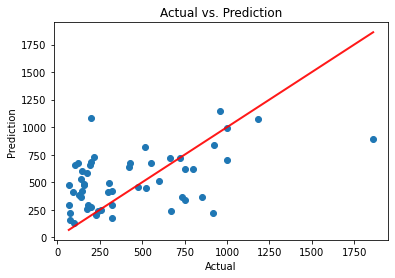

In [40]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_lm)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
reg_tree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 5)

In [43]:
tree_res = reg_tree.fit(X_train[['Years', 'Hits', 'League_N']], y_train)

[Text(697.5, 978.48, 'Hits <= 117.5\nmse = 216913.682\nsamples = 210\nvalue = 562.288'),
 Text(295.09615384615387, 761.0400000000001, 'Years <= 6.5\nmse = 91786.873\nsamples = 118\nvalue = 358.871'),
 Text(107.3076923076923, 543.6, 'Hits <= 44.5\nmse = 76520.362\nsamples = 65\nvalue = 231.028'),
 Text(53.65384615384615, 326.1600000000001, 'mse = 643568.924\nsamples = 5\nvalue = 524.467'),
 Text(160.96153846153845, 326.1600000000001, 'Years <= 3.5\nmse = 21492.849\nsamples = 60\nvalue = 206.575'),
 Text(107.3076923076923, 108.72000000000003, 'mse = 2128.925\nsamples = 30\nvalue = 110.183'),
 Text(214.6153846153846, 108.72000000000003, 'mse = 22274.066\nsamples = 30\nvalue = 302.967'),
 Text(482.88461538461536, 543.6, 'Hits <= 90.5\nmse = 65882.776\nsamples = 53\nvalue = 515.66'),
 Text(375.5769230769231, 326.1600000000001, 'League_N <= 0.5\nmse = 59045.995\nsamples = 37\nvalue = 455.608'),
 Text(321.9230769230769, 108.72000000000003, 'mse = 12268.507\nsamples = 16\nvalue = 360.677'),
 T

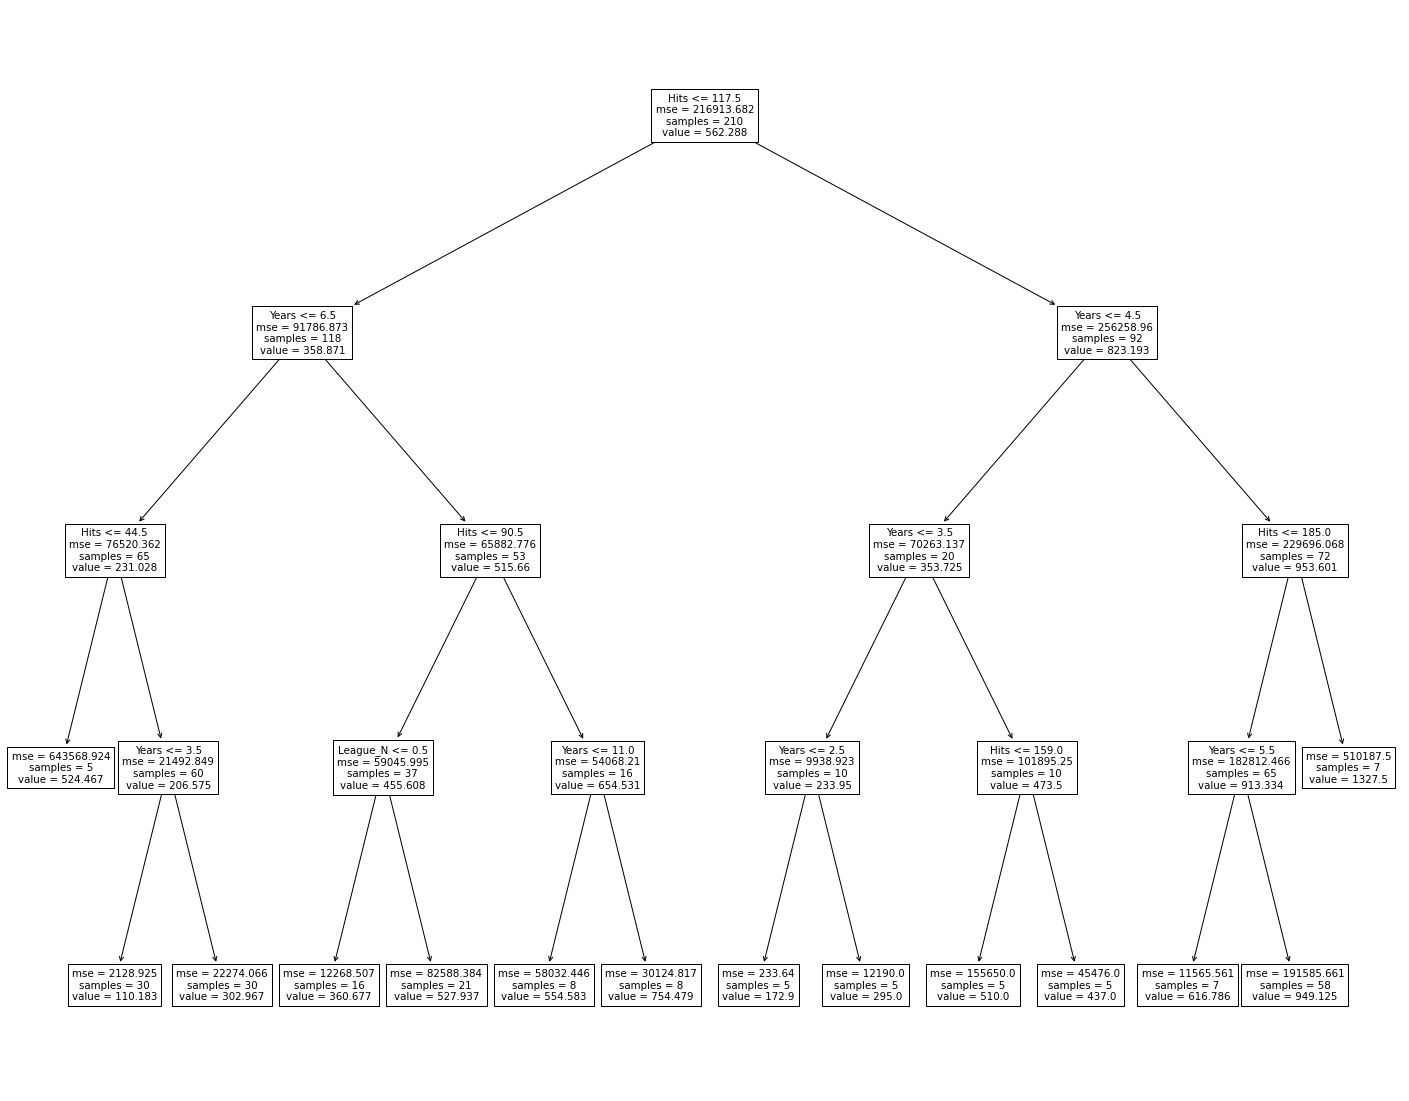

In [44]:
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = ['Years', 'Hits', 'League_N'])

In [45]:
pred_tree = tree_res.predict(X_test[['Years', 'Hits', 'League_N']])
pred_tree

array([524.4666    , 360.677125  , 754.479125  , 172.9       ,
       302.96666667, 616.78571429, 949.12477586, 949.12477586,
       172.9       , 527.93652381, 172.9       , 949.12477586,
       295.        , 949.12477586, 527.93652381, 110.18333333,
       302.96666667, 510.        , 524.4666    , 110.18333333,
       110.18333333, 302.96666667, 110.18333333, 302.96666667,
       949.12477586, 510.        , 302.96666667, 754.479125  ,
       295.        , 554.583375  , 527.93652381, 524.4666    ,
       302.96666667, 302.96666667, 110.18333333, 302.96666667,
       949.12477586, 110.18333333, 110.18333333, 949.12477586,
       360.677125  , 360.677125  , 949.12477586, 949.12477586,
       302.96666667, 302.96666667, 524.4666    , 302.96666667,
       295.        , 527.93652381, 172.9       , 949.12477586,
       360.677125  ])

In [46]:
#Absolute error
abs_err_tree = abs(y_test - pred_tree)

In [47]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_tree.mean(),
                                             'Median of AbsErrors' : abs_err_tree.median(),
                                             'SD of AbsErrors' :     abs_err_tree.std(),}, 
                                            index = ['Decision Tree Reg']))

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors
LM_t-test,257.945587,212.049049,221.127374
Decision Tree Reg,174.110764,120.000000,180.666873


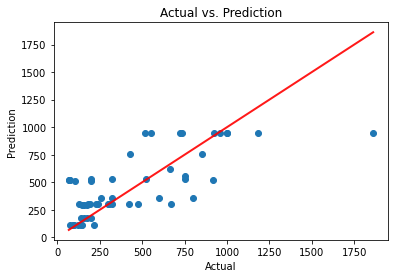

In [48]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_tree)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

In [49]:
from sklearn.decomposition import PCA
pca = PCA(.98)
train_pca =  pca.fit_transform(train.iloc[ :,var_ind])
# To get how many principal components was chosen
print(pca.n_components_)

2


In [50]:
train.iloc[ :,var_ind].shape

(210, 16)

In [51]:
print(np.sum(pca.explained_variance_ratio_))

0.9862615409503682


In [52]:
# Transform test set
test_pca = pca.transform(test.iloc[ :,var_ind])

In [53]:
print(train_pca.shape)
print(test_pca.shape)

(210, 2)
(53, 2)


In [54]:
#Add constant
train_pca = sm.add_constant(train_pca) 
test_pca = sm.add_constant(test_pca)

In [55]:
#Regression Model
lm_pca = sm.OLS(y_train, train_pca).fit()
lm_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     66.18
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           6.02e-23
Time:                        23:17:43   Log-Likelihood:                -1536.2
No. Observations:                 210   AIC:                             3078.
Df Residuals:                     207   BIC:                             3089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        562.2884     25.282     22.241      0.000     512.445     612.132
x1             0.1140      0.011     10.175      0.000       0.092       0.136
x2             0.4824      0.090      5.369      0.000       0.305       0.659
==============================================================================
Omnibus:                       84.539   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.584
Skew:                           1.570   Prob(JB):                     4.51e-77
Kurtosis:                       8.507   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Probability'>

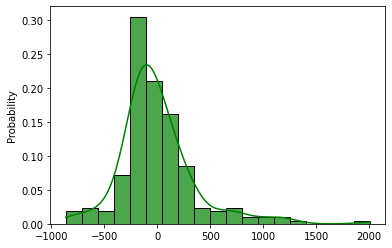

In [56]:
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm_pca.resid, stat = 'probability' ,
            kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm_pca.resid), max(lm_pca.resid), 20))

In [57]:
pred_lm_pca = lm_pca.predict(test_pca)

In [58]:
#Absolute error
abs_err_lm_pca = abs(y_test - pred_lm_pca)

In [59]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lm_pca.mean(),
                                             'Median of AbsErrors' : abs_err_lm_pca.median(),
                                             'SD of AbsErrors' :     abs_err_lm_pca.std(),}, 
                                            index = ['LM-PCA']))

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors
LM_t-test,257.945587,212.049049,221.127374
Decision Tree Reg,174.110764,120.000000,180.666873
LM-PCA,234.410575,143.898445,244.681134


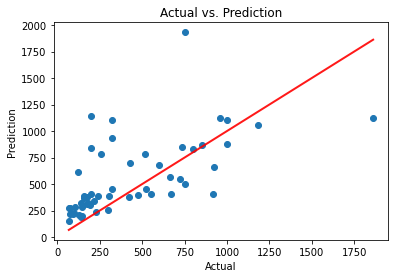

In [60]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_lm_pca)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')

# Logistic Regression

In [61]:
train_lg = pd.read_csv("loan-train.csv")
train_lg.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
test_lg = pd.read_csv("loan-test.csv")
test_lg.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Let’s make a copy of the train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [63]:
train_original=train_lg.copy()
test_original=test_lg.copy()

### Understanding the data

In [64]:
train_lg.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
test_lg.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

* We will predict the Loan_Status using the model built using the train data

In [66]:
train_lg.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [67]:
train_lg.shape

(614, 13)

In [68]:
test_lg.shape

(367, 12)

In [69]:
train_lg["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

* Normalize can be set to True to print proportions instead of number

In [70]:
train_lg["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

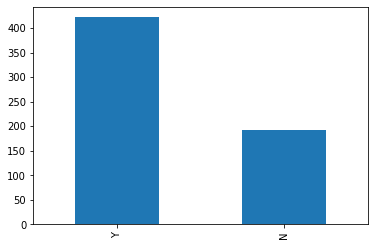

In [71]:
train_lg["Loan_Status"].value_counts().plot.bar()

### Independent Variable (Categorical)

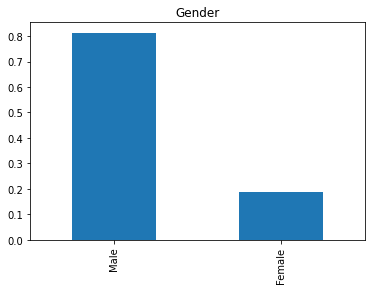

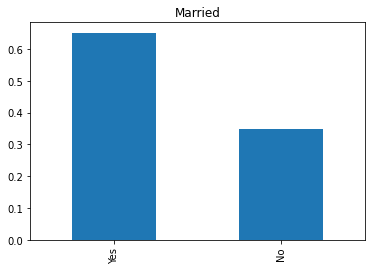

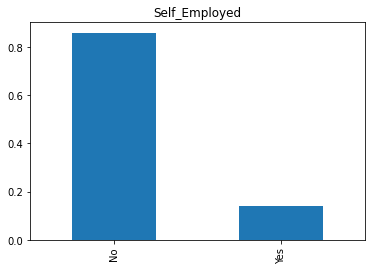

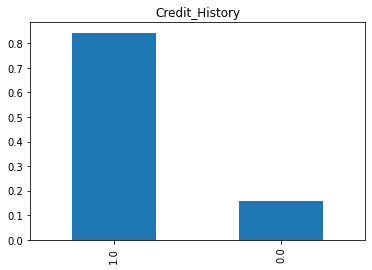

In [72]:
train_lg['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train_lg['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train_lg['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train_lg['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

### Independent Variable (Ordinal)

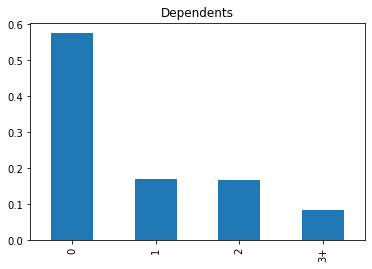

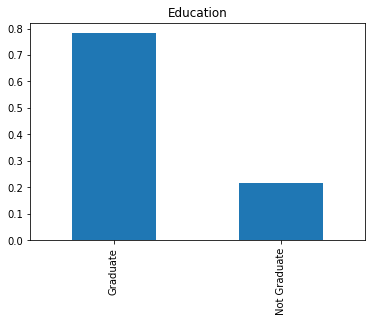

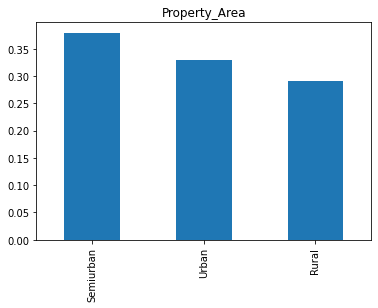

In [73]:
train_lg['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
train_lg['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train_lg['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

### Independent Variable (Numerical)

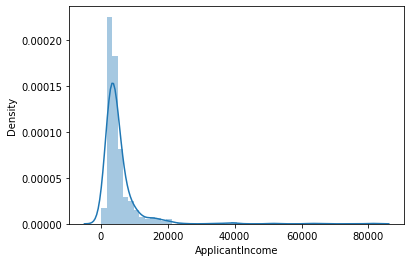

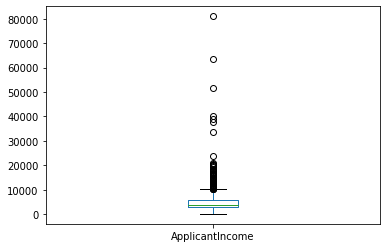

In [74]:
sns.distplot(train_lg['ApplicantIncome'])
plt.show()
train_lg['ApplicantIncome'].plot.box()
plt.show()

* The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education.

Text(0.5, 0.98, '')

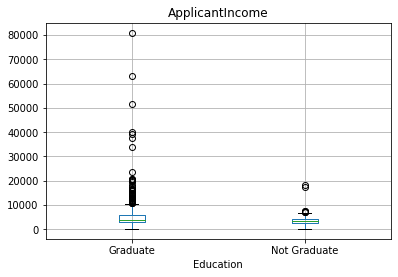

In [75]:
train_lg.boxplot(column='ApplicantIncome', by = "Education") 
plt.suptitle("")

### Missing value imputation

In [76]:
train_lg.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
train_lg['Gender'].fillna(train_lg['Gender'].mode()[0], inplace=True)
train_lg['Married'].fillna(train_lg['Married'].mode()[0], inplace=True)
train_lg['Dependents'].fillna(train_lg['Dependents'].mode()[0], inplace=True)
train_lg['Self_Employed'].fillna(train_lg['Self_Employed'].mode()[0], inplace=True)
train_lg['Credit_History'].fillna(train_lg['Credit_History'].mode()[0], inplace=True)

In [78]:
train_lg['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [79]:
train_lg['Loan_Amount_Term'].fillna(train_lg['Loan_Amount_Term'].mode()[0], inplace=True)

* We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [80]:
train_lg['LoanAmount'].fillna(train_lg['LoanAmount'].median(), inplace=True)

In [81]:
train_lg.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
test_lg['Gender'].fillna(test_lg['Gender'].mode()[0], inplace=True)
test_lg['Married'].fillna(test_lg['Married'].mode()[0], inplace=True)
test_lg['Dependents'].fillna(test_lg['Dependents'].mode()[0], inplace=True)
test_lg['Self_Employed'].fillna(test_lg['Self_Employed'].mode()[0], inplace=True)
test_lg['Credit_History'].fillna(test_lg['Credit_History'].mode()[0], inplace=True)
test_lg['Loan_Amount_Term'].fillna(test_lg['Loan_Amount_Term'].mode()[0], inplace=True)
test_lg['LoanAmount'].fillna(test_lg['LoanAmount'].median(), inplace=True)

### Outlier Treatment

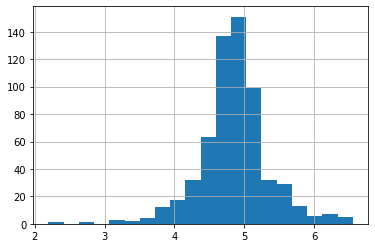

In [83]:
train_lg['LoanAmount_log']=np.log(train_lg['LoanAmount'])
train_lg['LoanAmount_log'].hist(bins=20)
test_lg['LoanAmount_log']=np.log(test_lg['LoanAmount'])

* Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

Let us make our first model predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

In [84]:
train_lg=train_lg.drop('Loan_ID',axis=1)
test_lg=test_lg.drop('Loan_ID',axis=1)

In [85]:
X = train_lg.drop('Loan_Status',1)
Y = train_lg.Loan_Status

logistic regression takes only the numerical values as input

In [86]:
X = pd.get_dummies(X)

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [89]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8432432432432433

Let’s make predictions for the test dataset.

In [90]:
test_lg=pd.get_dummies(test_lg)
pred_test = model.predict(test_lg)

In [91]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y